In [1]:
import numpy as np 
import pandas as pd
from rpy2 import robjects as ro
from pandas.rpy import common as com
import re
from matplotlib import pyplot as plt

//anaconda/envs/py3.5/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: The pandas.rpy module is deprecated and will be removed in a future version. We refer to external packages like rpy2. 
See here for a guide on how to port your code to rpy2: http://pandas.pydata.org/pandas-docs/stable/r_interface.html


In [2]:
ro.r('''library("ppcor")''');

//anaconda/envs/py3.5/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: MASS

  warnings.warn(x, RRuntimeWarning)


In [3]:
data = pd.read_excel("../../Downloads/airlines.(1).xlsx")

In [4]:
list(enumerate(data.columns))

[(0, 'Авиакомпания'),
 (1, 'Год основания авиакомпании'),
 (2, 'Время существования авиакомпании (лет)'),
 (3, 'Страна         (развитая - 1, развивающаяся - 0)'),
 (4, 'Unnamed: 4'),
 (5, 'Кол-во воздушных судов, шт. '),
 (6, 'Количество направлений (регулярных рейсов)'),
 (7, 'Пассажиро-оборот, млн. пасс-км'),
 (8, 'Кол-во пассажиров, млн. чел. '),
 (9, 'Грузоперевозки, млн.т-км'),
 (10, 'Альянс               (да - 1, нет - 0)'),
 (11, 'Unnamed: 11'),
 (12, 'Лет без катастроф (с 1973 г.)'),
 (13, 'Жертвы авиакатастроф (с 1973 г.)'),
 (14, 'Работники (тыс. чел)'),
 (15, 'Выручка (млрд. долл)'),
 (16, 'Издержки (млрд. долл)')]

In [5]:
col = list(data.columns)
col[10] = 'Альянс'
col[3] = 'Страна'
col[4] = 'Развитая'
data.columns = col

In [6]:
airlines = data.Авиакомпания
data.drop(['Авиакомпания', 'Unnamed: 11','Альянс','Страна'], axis=1, inplace=True)

## почистим таблицу...

In [7]:
data.head()

,Год основания авиакомпании,Время существования авиакомпании (лет),Развитая,"Кол-во воздушных судов, шт.",Количество направлений (регулярных рейсов),"Пассажиро-оборот, млн. пасс-км","Кол-во пассажиров, млн. чел.","Грузоперевозки, млн.т-км",Лет без катастроф (с 1973 г.),Жертвы авиакатастроф (с 1973 г.),Работники (тыс. чел),Выручка (млрд. долл),Издержки (млрд. долл)
0,Y,Year,Co,B,Dir,RPK,Pass,FTK,YC,Victim,Empl,Rev,Exp
1,1928,82,1,729,355,304009,161,3.2,20,236,82.4,28.1,28.4
2,1933,77,1,367,238,202455,71.4,4.9,3,116,34,28.26,29.99
3,1934,76,1,614,250,196904,85.7,2.4,7,895,70.2,19.9,20.9
4,1931,79,1,360,230,161663,56.1,2.34,7,257,46.3,16.3,16.5


In [8]:
data = data.ix[1:52,:]

In [9]:
data.head()

,Год основания авиакомпании,Время существования авиакомпании (лет),Развитая,"Кол-во воздушных судов, шт.",Количество направлений (регулярных рейсов),"Пассажиро-оборот, млн. пасс-км","Кол-во пассажиров, млн. чел.","Грузоперевозки, млн.т-км",Лет без катастроф (с 1973 г.),Жертвы авиакатастроф (с 1973 г.),Работники (тыс. чел),Выручка (млрд. долл),Издержки (млрд. долл)
1,1928,82,1,729,355,304009,161,3.2,20,236,82.4,28.1,28.4
2,1933,77,1,367,238,202455,71.4,4.9,3,116,34,28.26,29.99
3,1934,76,1,614,250,196904,85.7,2.4,7,895,70.2,19.9,20.9
4,1931,79,1,360,230,161663,56.1,2.34,7,257,46.3,16.3,16.5
5,1934,76,1,327,287,128437,45.6,1.3,10,25,35.3,12.6,12.7


## переименуем переменные, чтобы не было проблем с работой в R

In [10]:
cols = list(data.columns)
data.columns = ['a' + str(x) for x in range(len(data.columns))]

In [11]:
list(enumerate(zip(cols,data.columns)))

[(0, ('Год основания авиакомпании', 'a0')),
 (1, ('Время существования авиакомпании (лет)', 'a1')),
 (2, ('Развитая', 'a2')),
 (3, ('Кол-во воздушных судов, шт. ', 'a3')),
 (4, ('Количество направлений (регулярных рейсов)', 'a4')),
 (5, ('Пассажиро-оборот, млн. пасс-км', 'a5')),
 (6, ('Кол-во пассажиров, млн. чел. ', 'a6')),
 (7, ('Грузоперевозки, млн.т-км', 'a7')),
 (8, ('Лет без катастроф (с 1973 г.)', 'a8')),
 (9, ('Жертвы авиакатастроф (с 1973 г.)', 'a9')),
 (10, ('Работники (тыс. чел)', 'a10')),
 (11, ('Выручка (млрд. долл)', 'a11')),
 (12, ('Издержки (млрд. долл)', 'a12'))]

## скармливаем датафрейм в R

In [12]:
rdf = com.convert_to_r_dataframe(data.astype('float32'))
ro.globalenv['data'] = rdf

## считаем в R корреляцию Пирсона:

In [13]:
cormat = {}
pearson_cormat_est = {}
for col in data.columns:
    cormat[col] = str(ro.r('cor.test(data$a3, data$' + str(col) + ')'))
    pearson_cormat_est[col] = np.array(ro.r('cor.test(data$a3, data$' + str(col) + ')$estimate'))[0]

for key in np.sort(list(cormat.keys())):
    print('-'*80)
    print(cols[int(key[1:])])
    print(cormat[key])
    print('-'*80)

--------------------------------------------------------------------------------
Год основания авиакомпании

	Pearson's product-moment correlation

data:  data$a3 and data$a0
t = -2.1512, df = 50, p-value = 0.03632
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.52245833 -0.01972283
sample estimates:
       cor 
-0.2910566 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Время существования авиакомпании (лет)

	Pearson's product-moment correlation

data:  data$a3 and data$a1
t = 2.1512, df = 50, p-value = 0.03632
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.01972283 0.52245833
sample estimates:
      cor 
0.2910566 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------


## Спирмена:

In [14]:
cormat = {}
for col in data.columns:
    cormat[col] = str(ro.r('cor.test(data$a3, data$' + str(col) + ', method="spearman")'))

for key in np.sort(list(cormat.keys())):
    print('-'*80)
    print(cols[int(key[1:])])
    print(cormat[key])
    print('-'*80)

--------------------------------------------------------------------------------
Год основания авиакомпании

	Spearman's rank correlation rho

data:  data$a3 and data$a0
S = 29296, p-value = 0.07316
alternative hypothesis: true rho is not equal to 0
sample estimates:
       rho 
-0.2505926 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Время существования авиакомпании (лет)

	Spearman's rank correlation rho

data:  data$a3 and data$a1
S = 17556, p-value = 0.07316
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.2505926 


--------------------------------------------------------------------------------
--------------------------------------------------------------------------------
Работники (тыс. чел)

	Spearman's rank correlation rho

data:  data$a3 and data$a10
S = 6897.2, p-value = 5.185e-09
alternative hypothesis: true rho is not equ

## считаем матрицу частных корреляций:

In [15]:
pcor = np.array((ro.r('pcor(data)$estimate')))

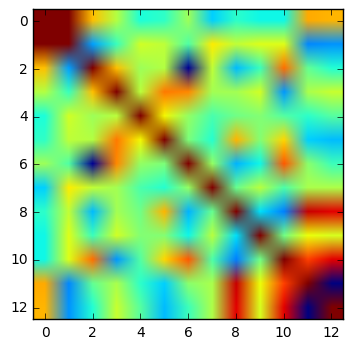

In [16]:
plt.imshow(pcor)
plt.show()

In [17]:
cormat = {}
for i, cor in enumerate(pcor[3]):
    cormat['a'+str(i)] = cor
    
#for key in np.sort(list(cormat.keys())):
#    print('-'*80)
#    print(cols[int(key[1:])])
#    print('Partial: {}'.format(cormat[key]))
#    print('Pearson: {}'.format(pearson_cormat_est[key]))
#    print('-'*80)

In [18]:
cormat = {cols[int(key[1:])] : cormat[key] for key in cormat.keys()}
pearson_cormat_est = {cols[int(key[1:])] : pearson_cormat_est[key] for key in pearson_cormat_est.keys()}

In [19]:
pd.DataFrame.from_dict(data={'partial':cormat,'peason':pearson_cormat_est})

,partial,peason
Время существования авиакомпании (лет),-0.146700,0.291057
Выручка (млрд. долл),0.120166,0.650732
Год основания авиакомпании,0.146700,-0.291057
"Грузоперевозки, млн.т-км",0.110184,-0.119757
Жертвы авиакатастроф (с 1973 г.),0.212594,0.165720
Издержки (млрд. долл),0.195874,0.651182
"Кол-во воздушных судов, шт.",1.000000,1.000000
"Кол-во пассажиров, млн. чел.",0.534532,0.944501
Количество направлений (регулярных рейсов),0.161136,0.749688
Лет без катастроф (с 1973 г.),0.111462,-0.181761


Ясно, что, при фиксированных остальных характеристиках компании, количество пассажиров меньше влияет на количество судов: например, компания может заниматься почтовыми перевозками. То же самое можно сказать про пассажирооборот.

Издержки, если смотреть исключительно на них, сильнее устранают неопределенность в размере компании, то есть и количестве судов, чем если бы мы знали остальные её характеристики.